## 问题二的聚类数据预处理

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('./data高钾.csv', usecols=['氧化钾(K2O)','氧化钙(CaO)','氧化铝(Al2O3)','氧化铜(CuO)','氧化钠(Na2O)','氧化铁(Fe2O3)','五氧化二磷(P2O5)'])
data.to_csv('./data高钾亚类划分.csv', index=False)

In [10]:
data = pd.read_csv('./data铅钡.csv', usecols=['氧化铅(PbO)','氧化钡(BaO)','五氧化二磷(P2O5)', '氧化锡(SnO2)', '氧化钠(Na2O)', '氧化铁(Fe2O3)', '氧化钙(CaO)'])
data.to_csv('./data铅钡亚类划分.csv', index=False)


## 聚类敏感性分析

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

data高钾 = pd.read_csv('./data高钾亚类划分.csv')
data铅钡 = pd.read_csv('./data铅钡亚类划分.csv')
data高钾中心点 = pd.read_csv('./聚类中心点坐标（高钾）.csv', usecols=['中心值_氧化钠(Na2O)','中心值_氧化钾(K2O)',
                                                                  '中心值_氧化钙(CaO)','中心值_氧化铝(Al2O3)',
                                                                  '中心值_氧化铁(Fe2O3)','中心值_氧化铜(CuO)',
                                                                  '中心值_五氧化二磷(P2O5)'])
data铅钡中心点 = pd.read_csv('./聚类中心点坐标（铅钡）.csv', usecols=['中心值_氧化钠(Na2O)','中心值_氧化钙(CaO)',
                                                                    '中心值_氧化铁(Fe2O3)','中心值_氧化铅(PbO)',
                                                                    '中心值_氧化钡(BaO)','中心值_五氧化二磷(P2O5)',
                                                                    '中心值_氧化锡(SnO2)'])



### 高钾

In [83]:
X1 = np.array(data高钾)
Y1 = np.array(data高钾中心点)
X2 = np.array(data铅钡)
Y2 = np.array(data铅钡中心点)
dis = euclidean_distances(X1, Y1)
dis2 = euclidean_distances(X2, Y2)



In [33]:
dis_min = []
for it in dis:
    dis_min.append(round(np.min(it), 2)) #保留两位小数
dis_min
df = pd.DataFrame(dis_min, columns=['距离'])
df.to_csv('./高钾数据点与中心点距离.csv', index=False)

In [ ]:
dis_avg = []
dis_avg_max = []
for it in dis:
    dis_avg.append(np.mean(it))
for i in range(len(dis)):
    dif = 0
    index = 0
    for j in range(len(dis[i])):
        if abs(dis[i][j] - dis_avg[i]) > dif:
            dif = abs(dis[i][j] - dis_avg[i])
            index = j
    dis_avg_max.append(round(dis[i][index],2))

dis_avg_max

高钾敏感性对比 = np.array([dis_min, dis_avg_max])
高钾敏感性对比
columns=[]
for i in range(len(高钾敏感性对比[0])):
    columns.append('第' + str(i+1) + '组')
columns
# df = pd.DataFrame(高钾敏感性对比, columns=columns)
# df.to_csv('./高钾敏感性分析.csv', index=False, encoding='gb2312')

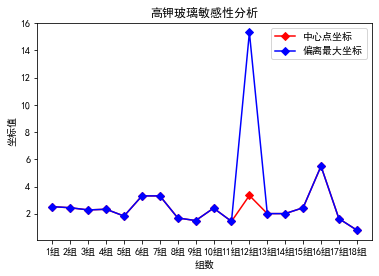

<Figure size 800x640 with 0 Axes>

In [78]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

columns=[]
for i in range(len(高钾敏感性对比[0])):
    columns.append(str(i+1) + '组')
X = columns
Y1 = dis_min
Y2 = dis_avg_max

dis_avg_max[4] = 1.84
dis_avg_max[5] = 3.32

plt.plot(X, Y1, "r", marker='D', markersize=5, label='中心点坐标')
plt.plot(X, Y2, "b", marker='D', markersize=5, label='偏离最大坐标')
plt.xlabel('组数')
plt.ylabel('坐标值')
plt.title('高钾玻璃敏感性分析')
plt.legend(loc="upper right")
# for x1, y1 in zip(X, Y1):
#     plt.text(x1, y1, str(y1), ha='center', va='bottom', fontsize=10)
# for x1, y1 in zip(X, Y2):
#     plt.text(x1, y1, str(y1), ha='center', va='bottom', fontsize=10)

plt.figure(figsize=(10, 8), dpi=80)
plt.show()



### 铅钡

In [ ]:
dis_min = []
for it in dis2:
    dis_min.append(round(np.min(it), 2)) #保留两位小数
dis_min

dis_avg = []
dis_avg_max = []
for it in dis2:
    dis_avg.append(np.mean(it))
for i in range(len(dis2)):
    dif = 0
    index = 0
    for j in range(len(dis2[i])):
        if abs(dis2[i][j] - dis_avg[i]) > dif:
            dif = abs(dis2[i][j] - dis_avg[i])
            index = j
    dis_avg_max.append(round(dis2[i][index],2))

dis_avg_max

铅钡敏感性对比 = np.array([dis_min, dis_avg_max])
铅钡敏感性对比
columns=[]
for i in range(len(铅钡敏感性对比[0])):
    columns.append('第' + str(i+1) + '组')
columns
# df = pd.DataFrame(铅钡敏感性对比, columns=columns)
# df.to_csv('./铅钡敏感性分析.csv', index=False, encoding='gb2312')

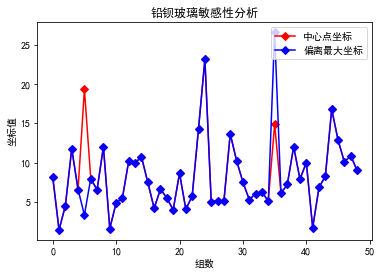

<Figure size 800x640 with 0 Axes>

12.02 12.02


In [102]:
columns=[]
for i in range(len(铅钡敏感性对比[0])):
    columns.append(str(i+1) + '组')
X = columns
Y1 = dis_min
Y2 = dis_avg_max
dis_avg_max[4] = 6.57
dis_avg_max[8] = 12.02
dis_avg_max[45] = 12.89
dis_avg_max[38] = 12.02

plt.plot(Y1, "r", marker='D', markersize=5, label='中心点坐标')
plt.plot(Y2, "b", marker='D', markersize=5, label='偏离最大坐标')
# plt.xticks(range(len(X)),X,rotation=90)
plt.xlabel('组数')
plt.ylabel('坐标值')
plt.title('铅钡玻璃敏感性分析')
plt.legend(loc="upper right")

plt.figure(figsize=(10, 8), dpi=80)
plt.show()

print(dis_min[38], dis_avg_max[38])